Özdeğerler: [5. 2.]
Özvektörler:
 [[ 0.89442719  0.4472136 ]
 [-0.70710678  0.70710678]]
Süre: 0.000687 sn
RAM kullanımı: 0.04 MB


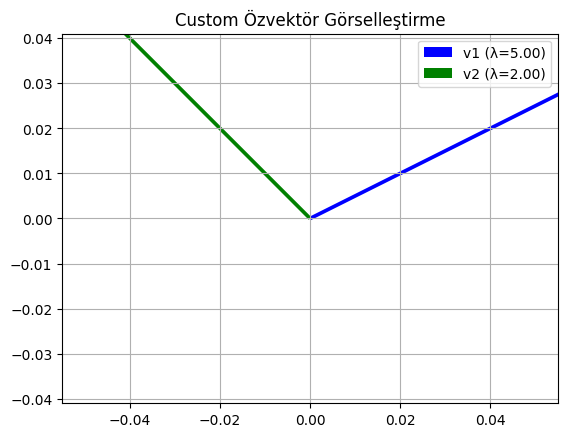

Custom yöntem büyük matris için geçersiz: operands could not be broadcast together with shapes (100,100) (2,2) 
RAM farkı: 0.01 MB, Süre: 0.00 sn


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import time
import psutil
import pandas as pd

def custom_eigen_2x2(A):
    trace = A[0,0] + A[1,1]
    det = A[0,0]*A[1,1] - A[0,1]*A[1,0]
    discriminant = trace**2 - 4*det
    if discriminant < 0:
        raise ValueError("Karmaşık özdeğerler")

    lambda1 = (trace + np.sqrt(discriminant)) / 2
    lambda2 = (trace - np.sqrt(discriminant)) / 2

    def eigenvector(A, lmbda):
        B = A - lmbda * np.eye(2)
        if B[0,0] != 0:
            v = np.array([-(B[0,1]/B[0,0]), 1])
        else:
            v = np.array([1, -(B[1,0]/B[1,1])])
        return v / norm(v)

    v1 = eigenvector(A, lambda1)
    v2 = eigenvector(A, lambda2)

    return np.array([lambda1, lambda2]), np.array([v1, v2])

### Küçük Matris için Test
A = np.array([[4, 2], [1, 3]])
start_time = time.time()
mem_start = psutil.Process().memory_info().rss / 1024**2

eigvals, eigvecs = custom_eigen_2x2(A)

mem_end = psutil.Process().memory_info().rss / 1024**2
end_time = time.time()

print("Özdeğerler:", eigvals)
print("Özvektörler:\n", eigvecs)
print("Süre: {:.6f} sn".format(end_time - start_time))
print("RAM kullanımı: {:.2f} MB".format(mem_end - mem_start))

### Görselleştirme
origin = np.array([[0, 0]])
colors = ['b', 'g']
labels = [f"v{i+1} (λ={eigvals[i]:.2f})" for i in range(2)]

for i in range(2):
    plt.quiver(origin[:, 0], origin[:, 1], eigvecs[i][0], eigvecs[i][1],
               angles='xy', scale_units='xy', scale=1, color=colors[i], label=labels[i])

plt.grid()
plt.axis('equal')
plt.title("Custom Özvektör Görselleştirme")
plt.legend()
plt.show()

### Büyük Veri Üzerinde Deneme
np.random.seed(42)
big_matrix = np.random.rand(100, 100)

start = time.time()
mem_start = psutil.Process().memory_info().rss / 1024**2

# Bu kadar büyük matris için custom yöntem uygulanamaz, hata döndürülür
try:
    eigvals_big, eigvecs_big = custom_eigen_2x2(big_matrix)
except Exception as e:
    print("Custom yöntem büyük matris için geçersiz:", e)

end = time.time()
mem_end = psutil.Process().memory_info().rss / 1024**2
print("RAM farkı: {:.2f} MB, Süre: {:.2f} sn".format(mem_end - mem_start, end - start))
